# <font color='violet'> Redes neuronales artificiales </font>

En este notebook veremos como implementar una red neuronal artificial usando el framework `TensorFlow`.

Usaremos la versión TF2.X que posee una ejecución `eager` lo que resulta más sencillo de implementar a través de su API en Keras para Python.

En este notebook veremos:
1. Regresión lineal simple.
2. Regresión lineal multivariable.
3. Regresión logística.

Para estos casos se llevará a cabo el mismo flujo de pasos:
* Realizamos un análisis exploratorio de datos (EDA).
* Separamos los datos en entrenamiento, validación y testeo.
* Construimos la arquitectura de la red neuronal.
* Establecemos la función de costo, optimizador y métricas que controlarán todo el proceso de entrenamiento y validación.
* Entrenamos el modelo.
* Evaluamos el modelo.
* Realizamos predicciones.




---



# 1. Regresión lineal simple

In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Armamos el dataset

In [35]:
# Para esto creamos un dataset ficticcio con sklearn
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000, n_features=1, noise=3, random_state=42)

In [36]:
print(f"Variable de entrada X: {X.shape}, con dimensiones = {X.ndim} | datos tipo: {X.dtype}")
print(f"Variable de salida y: {y.shape}, con dimensiones = {y.ndim} | datos tipo: {y.dtype}")

Variable de entrada X: (1000, 1), con dimensiones = 2 | datos tipo: float64
Variable de salida y: (1000,), con dimensiones = 1 | datos tipo: float64


## Visualizamos el dataset

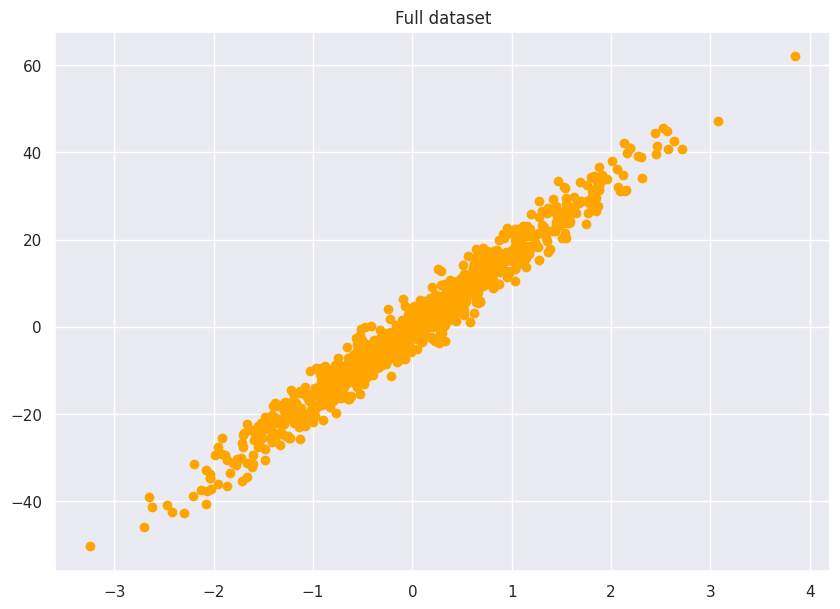

In [37]:
# Vamos a visualizar los datos para regresión
plt.figure(figsize=(10,7))
plt.scatter(X, y, c='orange')
plt.title("Full dataset");

## Separamos el dataset

Como el método de sklearn de `train_test_split` solo nos permite separar en dos el dataset, lo haremos **dos veces** para separar en train, validation y test.

In [38]:
from sklearn.model_selection import train_test_split
# Primero separamos en val y train
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.15, random_state=42)
# Luego tomamos el conjunto de train y lo volvemos a separan en train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.15, random_state=42)

In [39]:
print(f"Datos de entrenamiento: {Xtrain.shape} | con dimensiones = {Xtrain.ndim} | datos tipo: {Xtrain.dtype}")
print(f"Datos de validacion: {Xval.shape} | con dimensiones = {Xval.ndim} | datos tipo: {Xval.dtype}")
print(f"Datos de testeo: {Xtest.shape} | con dimensiones = {Xtest.ndim} | datos tipo: {Xtest.dtype}")

Datos de entrenamiento: (722, 1) | con dimensiones = 2 | datos tipo: float64
Datos de validacion: (150, 1) | con dimensiones = 2 | datos tipo: float64
Datos de testeo: (128, 1) | con dimensiones = 2 | datos tipo: float64


## Contruimos la arquitectura de la red neuronal


### 1. Primera forma de construir una red

In [40]:
# Arquitectura de red con método Funcional de Keras
input = tf.keras.layers.Input(shape=[1])
output = tf.keras.layers.Dense(1,activation='linear')(input)
model_0_1 = tf.keras.Model(input,output)

In [41]:
# Ejemplo de clase
input = tf.keras.layers.Input(shape=[1])
capa_1 = tf.keras.layers.Dense(1,activation='relu')(input)
capa_2 = tf.keras.layers.Dense(1,activation='relu')(capa_1)
capa_3 = tf.keras.layers.Dense(1,activation='relu')(capa_2)
output = tf.keras.layers.Dense(1,activation='linear')(capa_3)
modelo = tf.keras.Model(input,output)

### 2. Segunda forma de construir una red

In [42]:
# Arquitectura de red con método Sequential de Keras
# Perceptor simple
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1]),
    tf.keras.layers.Dense(1,activation='linear')
])

## Configuramos el modelo

In [43]:
# Resumen del modelo y la arquitectura

model_0.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenamos el modelo

In [44]:
history_slr = model_0.fit(Xtrain,ytrain,
                          epochs=200,
                          validation_data = (Xval,yval))

Epoch 1/200
23/23 [==============================] - 1s 9ms/step - loss: 13.7992 - mae: 13.7992 - val_loss: 14.6614 - val_mae: 14.6614
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 13.6694 - mae: 13.6694 - val_loss: 14.5196 - val_mae: 14.5196
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 13.5398 - mae: 13.5398 - val_loss: 14.3771 - val_mae: 14.3771
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 13.4089 - mae: 13.4089 - val_loss: 14.2358 - val_mae: 14.2358
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 13.2793 - mae: 13.2793 - val_loss: 14.0950 - val_mae: 14.0950
Epoch 6/200
23/23 [==============================] - 0s 6ms/step - loss: 13.1500 - mae: 13.1500 - val_loss: 13.9535 - val_mae: 13.9535
Epoch 7/200
23/23 [==============================] - 0s 6ms/step - loss: 13.0203 - mae: 13.0203 - val_loss: 13.8121 - val_mae: 13.8121
Epoch 8/200
23/23 [==============================] - 0s

## Evaluamos el modelo

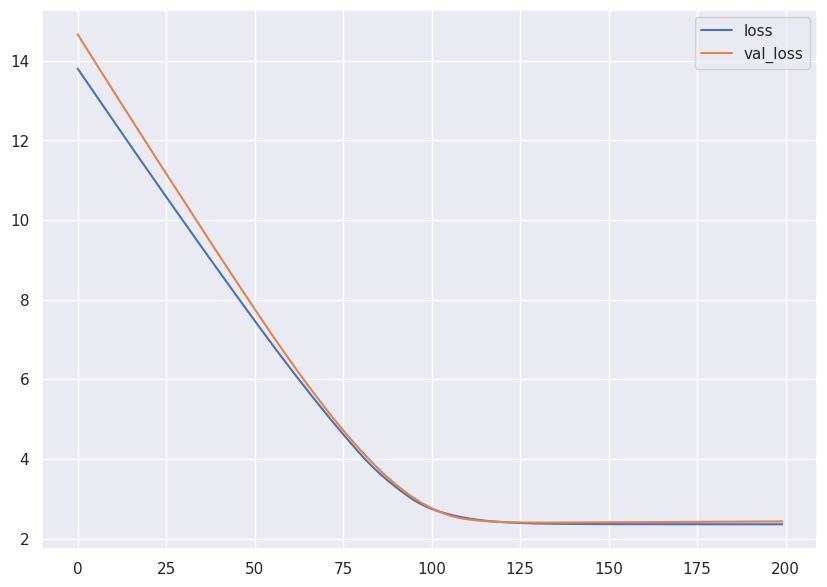

In [45]:
# Ploteamos las metricas que se almacenaron en la variable history_slr
metrics = pd.DataFrame(history_slr.history)
metrics[['loss','val_loss']].plot(figsize=(10,7));

In [46]:
# TensorFlow posee el método evaluate
model_0.evaluate(Xtest,ytest)

4/4 [==============================] - 0s 3ms/step - loss: 2.3708 - mae: 2.3708


[2.3708200454711914, 2.3708200454711914]

## Hacemos una regresión lineal simple con datos nuevos

Para esto usamos el set de Testeo que no se usó durante el entrenamiento

In [47]:
# Calculamos predicciones y ploteamos
from sklearn import metrics as ms
y_pred = model_0.predict(Xtest)
ms.mean_absolute_error(y_true = ytest, y_pred = y_pred)

4/4 [==============================] - 0s 2ms/step


2.370820156820537

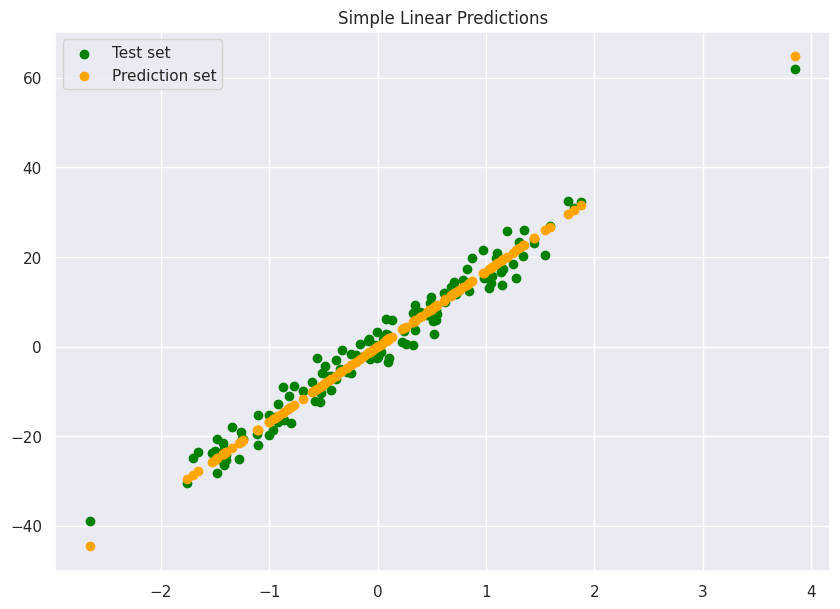

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(Xtest, ytest, c='green', label='Test set')
plt.scatter(Xtest, y_pred, c='orange', label='Prediction set')
plt.legend()
plt.title("Simple Linear Predictions");

# 2. Regresión lineal multivariante

## Armamos el dataset

In [49]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Visualizamos el dataset

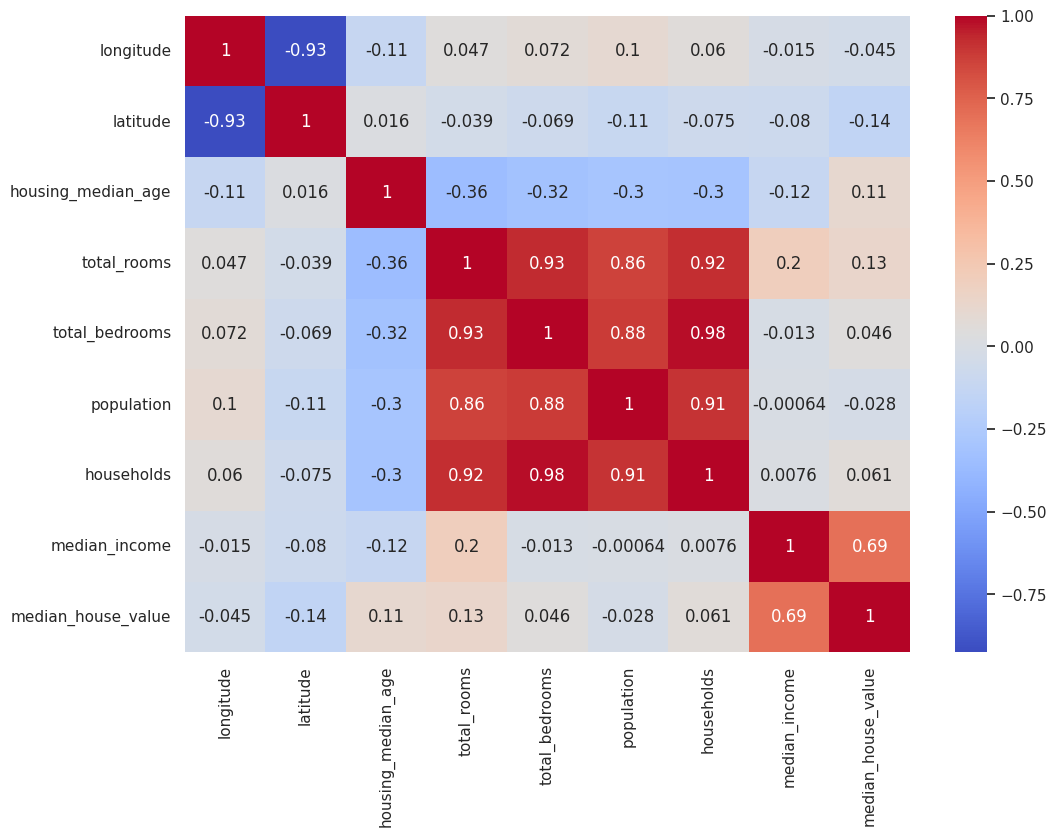

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(),annot=True,cmap='coolwarm');

In [50]:
X = data.drop(columns=['housing_median_age','households','median_house_value','latitude','longitude']).to_numpy()
Y = data['median_house_value'].to_numpy()

In [51]:
print(f"Variable de entrada X: {X.shape} | con dimensiones = {X.ndim} | datos tipo: {X.dtype}")
print(f"Variable de salida Y: {y.shape} | con dimensiones = {Y.ndim} | datos tipo: {Y.dtype}")

Variable de entrada X: (17000, 4) | con dimensiones = 2 | datos tipo: float64
Variable de salida Y: (1000,) | con dimensiones = 1 | datos tipo: float64


## Separamos el dataset

In [52]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X, Y, test_size=0.15, random_state=42)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.15, random_state=42)

In [53]:
print(f"Datos de entrenamiento: {Xtrain.shape} | con dimensiones = {Xtrain.ndim} | datos tipo: {Xtrain.dtype}")
print(f"Datos de validacion: {Xval.shape} | con dimensiones = {Xval.ndim} | datos tipo: {Xval.dtype}")
print(f"Datos de testeo: {Xtest.shape} | con dimensiones = {Xtest.ndim} | datos tipo: {Xtest.dtype}")

Datos de entrenamiento: (12282, 4) | con dimensiones = 2 | datos tipo: float64
Datos de validacion: (2550, 4) | con dimensiones = 2 | datos tipo: float64
Datos de testeo: (2168, 4) | con dimensiones = 2 | datos tipo: float64


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.fit_transform(Xval)
Xtest = scaler.fit_transform(Xtest)

## Construimos la arquitectura de red para regresión

In [55]:
# Red neuronal con dos capas
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[4]),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1,activation='linear')
])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Configuramos el modelo

In [56]:
model_1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
                loss = tf.keras.losses.mae,
                metrics=['mae'])

## Entrenamos el modelo

In [57]:
history_mlr = model_1.fit(Xtrain,ytrain,
            epochs=200,
            validation_data=(Xval,yval))

Epoch 1/200
384/384 [==============================] - 2s 3ms/step - loss: 205548.7969 - mae: 205548.7969 - val_loss: 211587.0312 - val_mae: 211587.0312
Epoch 2/200
384/384 [==============================] - 1s 3ms/step - loss: 205491.8438 - mae: 205491.8438 - val_loss: 211500.7500 - val_mae: 211500.7500
Epoch 3/200
384/384 [==============================] - 1s 3ms/step - loss: 205392.5156 - mae: 205392.5156 - val_loss: 211367.6094 - val_mae: 211367.6094
Epoch 4/200
384/384 [==============================] - 1s 3ms/step - loss: 205250.7031 - mae: 205250.7031 - val_loss: 211187.6562 - val_mae: 211187.6562
Epoch 5/200
384/384 [==============================] - 1s 3ms/step - loss: 205066.7500 - mae: 205066.7500 - val_loss: 210961.1094 - val_mae: 210961.1094
Epoch 6/200
384/384 [==============================] - 1s 3ms/step - loss: 204840.7969 - mae: 204840.7969 - val_loss: 210687.8438 - val_mae: 210687.8438
Epoch 7/200
384/384 [==============================] - 1s 4ms/step - loss: 204572.

## Evaluamos el modelo

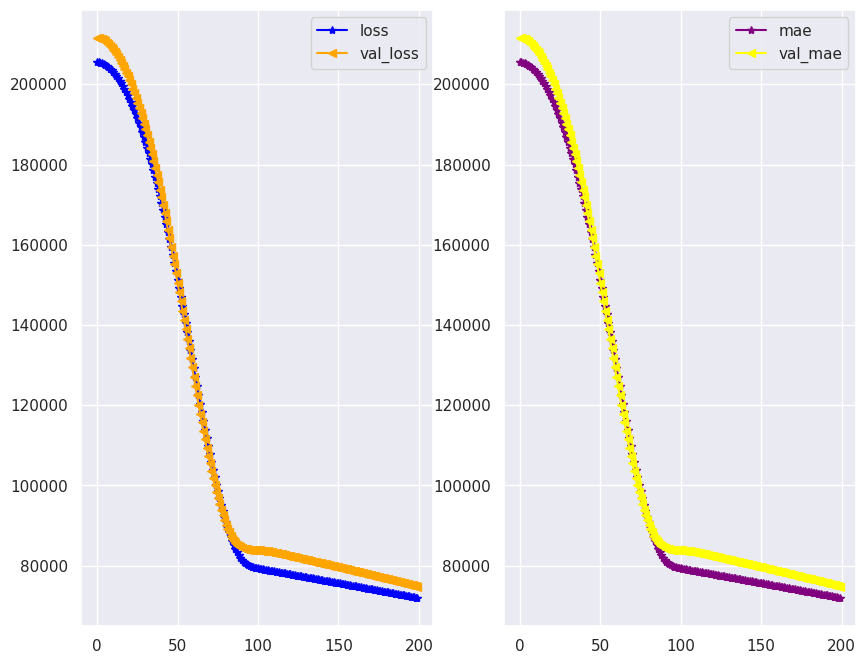

In [58]:
# Ploteamos las metricas que se almacenaron en la variable history_slr
metrics = pd.DataFrame(history_mlr.history)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(metrics['loss'],marker = '*',color='blue',label='loss')
plt.plot(metrics['val_loss'],marker = '<',color='orange',label='val_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(metrics['mae'],marker = '*',color='purple',label='mae')
plt.plot(metrics['val_mae'],marker = '<',color='yellow',label='val_mae')
plt.legend();

In [59]:
#Evaluamos el modelo usando el metodo evaluate()
model_1.evaluate(Xtest,ytest)

68/68 [==============================] - 0s 3ms/step - loss: 75049.1562 - mae: 75049.1562


[75049.15625, 75049.15625]

## Optimizamos el modelo de regresión multivariante

Las formas de optimizar un modelo son mediante el ajuste de hiperparametros que controlan el *aprendizaje*. Este proceso resulta que es experimental dependiendo el tipo de problema, si bien hay ciertos patrones que se siguen, el ajuste de hiperparametros resulta casi un `arte`. Algunos de estos ajustes pueden ser:
* Cantidad de neuronas por capa.
* Cantidad de capas ocultas.
* El valor de learning rate.
* El método de descenso de gradiente.
* Función de activación.


In [60]:
# Creamos una nueva arquitectura con más neuronas, capas y funciones de activación
model_1_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[4]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear' )
])
model_1_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                50        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model_1_1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
                loss = tf.keras.losses.mae,
                metrics=['mae'])
history_mlr_1 = model_1_1.fit(Xtrain,ytrain,
            epochs=80,
            validation_data=(Xval,yval))

Epoch 1/80
384/384 [==============================] - 2s 3ms/step - loss: 204939.4219 - mae: 204939.4219 - val_loss: 209120.5469 - val_mae: 209120.5469
Epoch 2/80
384/384 [==============================] - 2s 5ms/step - loss: 198082.2031 - mae: 198082.2031 - val_loss: 194785.8125 - val_mae: 194785.8125
Epoch 3/80
384/384 [==============================] - 3s 9ms/step - loss: 176013.9688 - mae: 176013.9688 - val_loss: 158744.2500 - val_mae: 158744.2500
Epoch 4/80
384/384 [==============================] - 1s 3ms/step - loss: 132278.3906 - mae: 132278.3906 - val_loss: 104531.1094 - val_mae: 104531.1094
Epoch 5/80
384/384 [==============================] - 1s 3ms/step - loss: 88169.4297 - mae: 88169.4297 - val_loss: 83954.1562 - val_mae: 83954.1562
Epoch 6/80
384/384 [==============================] - 1s 3ms/step - loss: 78757.3281 - mae: 78757.3281 - val_loss: 82684.2891 - val_mae: 82684.2891
Epoch 7/80
384/384 [==============================] - 1s 3ms/step - loss: 77332.4219 - mae: 7733

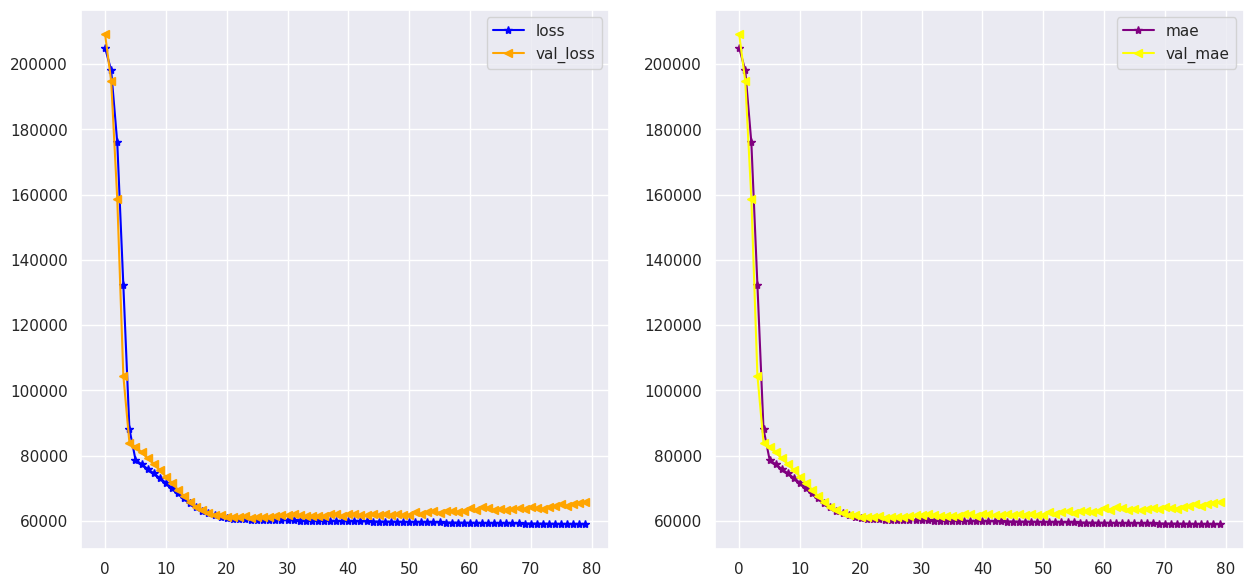

In [62]:
# Ploteamos las metricas que se almacenaron en la variable history_slr
metrics = pd.DataFrame(history_mlr_1.history)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(metrics['loss'],marker = '*',color='blue',label='loss')
plt.plot(metrics['val_loss'],marker = '<',color='orange',label='val_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(metrics['mae'],marker = '*',color='purple',label='mae')
plt.plot(metrics['val_mae'],marker = '<',color='yellow',label='val_mae')
plt.legend();

He probado un learning rate (alfa) de 0.01, lo cual ha performado muy bien pero a partir de la epoca 30 empieza a marcarse un *overfitting* que lo podemos observas por la varianza entre los datos de entrenamiento y los de validación que empieza a crecer.

## <font color='lightgreen'>Experimentar para optimizar la regresión</font> 🤓

Aún podemos mejorar el `aprendizaje` probando algunos hiperparámetros:
* Agregando más capas
* Agregando más neuronas
* Probar optimizador Adam()
* Probar más epocas

In [65]:
# Creamos una nueva arquitectura con más neuronas, capas y funciones de activación
model_1_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[4]),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear' )
])
model_1_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 20)                100       
                                                                 
 dense_26 (Dense)            (None, 20)                420       
                                                                 
 dense_27 (Dense)            (None, 20)                420       
                                                                 
 dense_28 (Dense)            (None, 1)                 21        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model_1_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.mae,
                metrics=['mae'])
history_mlr_1 = model_1_1.fit(Xtrain,ytrain,
            epochs=80,
            validation_data=(Xval,yval))

Epoch 1/80
384/384 [==============================] - 4s 4ms/step - loss: 121543.1484 - mae: 121543.1484 - val_loss: 78410.1484 - val_mae: 78410.1484
Epoch 2/80
384/384 [==============================] - 1s 4ms/step - loss: 69394.0312 - mae: 69394.0312 - val_loss: 64712.1055 - val_mae: 64712.1055
Epoch 3/80
384/384 [==============================] - 1s 4ms/step - loss: 61217.0195 - mae: 61217.0195 - val_loss: 60927.9258 - val_mae: 60927.9258
Epoch 4/80
384/384 [==============================] - 1s 4ms/step - loss: 60265.4648 - mae: 60265.4648 - val_loss: 61355.2930 - val_mae: 61355.2930
Epoch 5/80
384/384 [==============================] - 2s 4ms/step - loss: 59979.2656 - mae: 59979.2656 - val_loss: 62524.4688 - val_mae: 62524.4688
Epoch 6/80
384/384 [==============================] - 2s 5ms/step - loss: 59835.3477 - mae: 59835.3477 - val_loss: 62457.5391 - val_mae: 62457.5391
Epoch 7/80
384/384 [==============================] - 1s 4ms/step - loss: 59615.3711 - mae: 59615.3711 - val_l

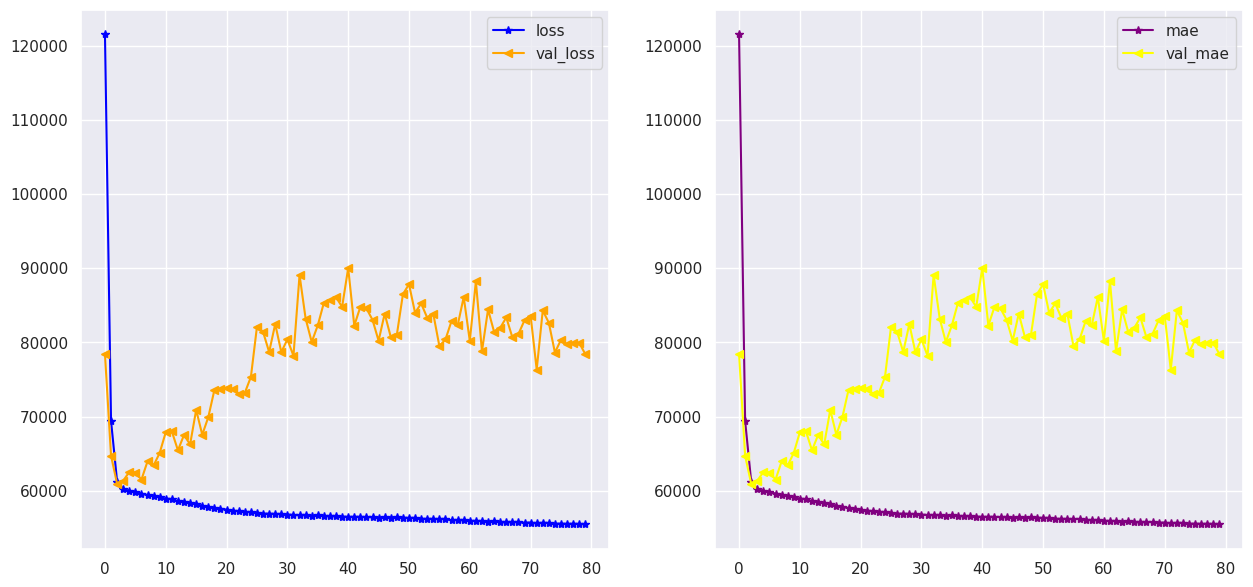

In [67]:
# Ploteamos las metricas que se almacenaron en la variable history_slr
metrics = pd.DataFrame(history_mlr_1.history)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(metrics['loss'],marker = '*',color='blue',label='loss')
plt.plot(metrics['val_loss'],marker = '<',color='orange',label='val_loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(metrics['mae'],marker = '*',color='purple',label='mae')
plt.plot(metrics['val_mae'],marker = '<',color='yellow',label='val_mae')
plt.legend();

# 3. Regresión logística (clasificación)

Para este ejercicio creamos un dataset de prueba con sklearn. Este nos crea dos conjuntos de datos para clasificar de forma binaria, pero resulta que no son linealmente separables por lo que tendremos que usar un `Perceptron Multicapa`.

## Armamos el dataset

In [68]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, factor=0.1,noise=0.1,random_state=42)

In [69]:
print(f"Variable de entrada X: {X.shape} | con dimensiones = {X.ndim} | datos tipo: {X.dtype}")
print(f"Variable de salida y: {y.shape} | con dimensiones = {y.ndim} | datos tipo: {y.dtype}")

Variable de entrada X: (1000, 2) | con dimensiones = 2 | datos tipo: float64
Variable de salida y: (1000,) | con dimensiones = 1 | datos tipo: int64


In [70]:
[:2]

array([[0.0363413 , 0.10210926],
       [0.01196432, 0.09342753]])

In [71]:
set(y) #Estas son las dos clases que posee el dataset [0,1]

{0, 1}

## Visualizamos el dataset

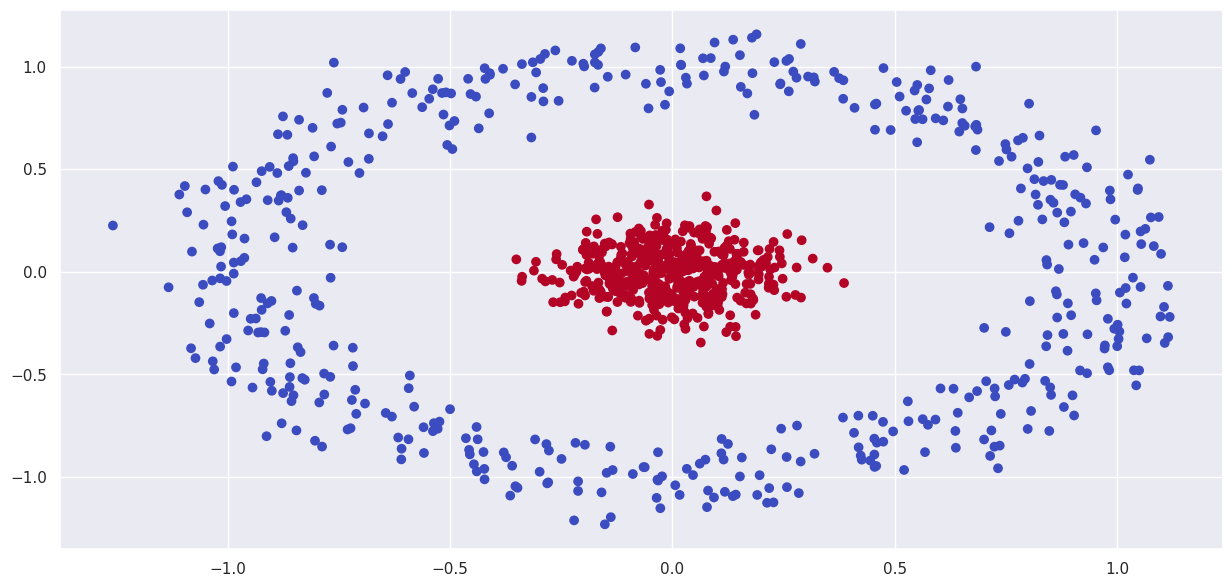

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm');

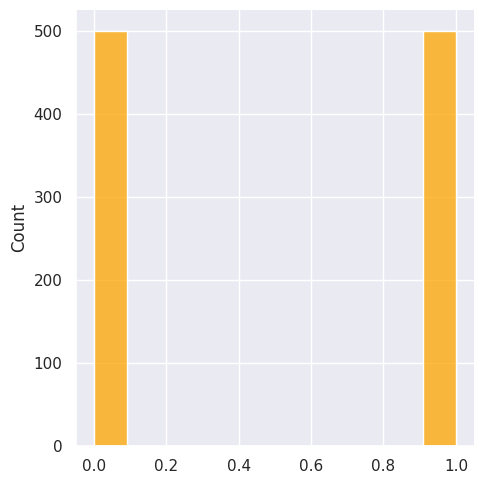

In [73]:
ns.displot(y,color='orange');

## Separamos el dataset

In [74]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.15, random_state=42)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.15, random_state=42)

In [75]:
print(f"Datos de entrenamiento: {Xtrain.shape} | con dimensiones = {Xtrain.ndim} | datos tipo: {Xtrain.dtype}")
print(f"Datos de validacion: {Xval.shape} | con dimensiones = {Xval.ndim} | datos tipo: {Xval.dtype}")
print(f"Datos de testeo: {Xtest.shape} | con dimensiones = {Xtest.ndim} | datos tipo: {Xtest.dtype}")

Datos de entrenamiento: (722, 2) | con dimensiones = 2 | datos tipo: float64
Datos de validacion: (150, 2) | con dimensiones = 2 | datos tipo: float64
Datos de testeo: (128, 2) | con dimensiones = 2 | datos tipo: float64


In [76]:
Xtrain.min(), Xtrain.max()

(-1.257778829864198, 1.157937973680911)

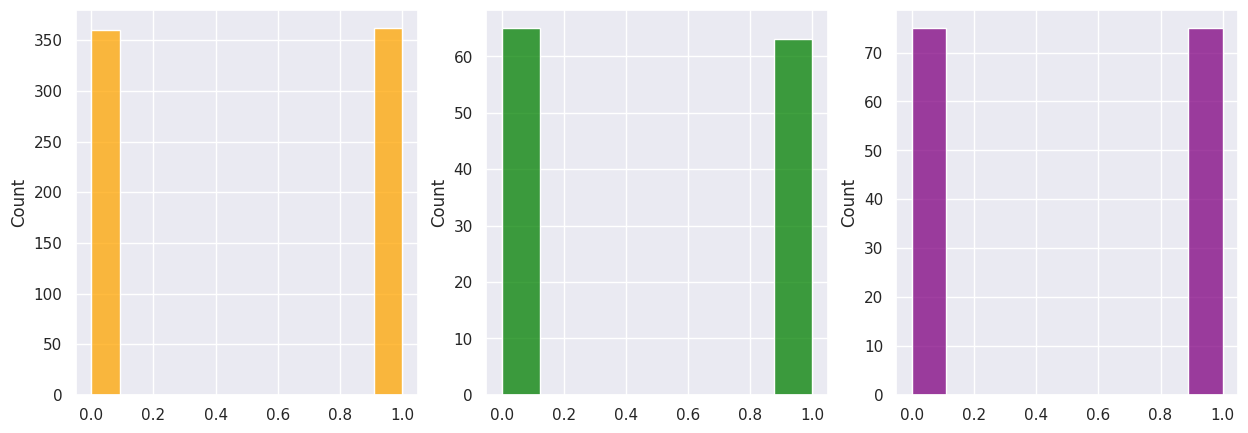

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(ytrain,color='orange')
plt.subplot(1,3,2)
sns.histplot(ytest,color='green')
plt.subplot(1,3,3)
sns.histplot(yval,color='purple');

## Construimos la arquitectura de red para clasificación

In [78]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[2]),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 4)                 12        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Configuramos el modelo

In [79]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),# RMSprop(),Adagrad()
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

## Entrenamos el modelo

In [80]:
history_clasifier = model_2.fit(Xtrain,ytrain,
                                epochs=50,
                                validation_data=(Xval,yval))

Epoch 1/50
23/23 [==============================] - 2s 10ms/step - loss: 0.5955 - accuracy: 0.5360 - val_loss: 0.5657 - val_accuracy: 0.6333
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5849 - accuracy: 0.6399 - val_loss: 0.5563 - val_accuracy: 0.6733
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5761 - accuracy: 0.6745 - val_loss: 0.5477 - val_accuracy: 0.7333
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5679 - accuracy: 0.7008 - val_loss: 0.5392 - val_accuracy: 0.7467
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5599 - accuracy: 0.7244 - val_loss: 0.5310 - val_accuracy: 0.7733
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5518 - accuracy: 0.7396 - val_loss: 0.5231 - val_accuracy: 0.7867
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5437 - accuracy: 0.7548 - val_loss: 0.5150 - val_accuracy: 0.7933
Epoch 8/50
23/23 [=

## Evaluamos el modelo

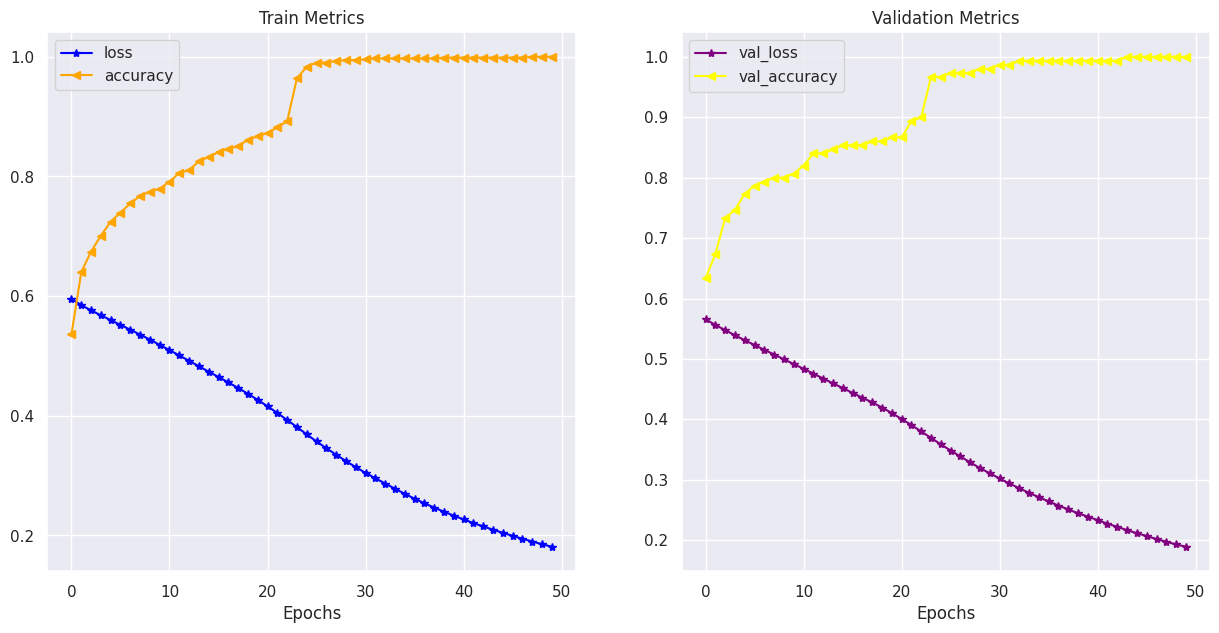

In [81]:
# Ploteamos las metricas que se almacenaron en la variable history_slr
metrics = pd.DataFrame(history_clasifier.history)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(metrics['loss'],marker = '*',color='blue',label='loss')
plt.plot(metrics['accuracy'],marker = '<',color='orange',label='accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title("Train Metrics")
plt.subplot(1,2,2)
plt.plot(metrics['val_loss'],marker = '*',color='purple',label='val_loss')
plt.plot(metrics['val_accuracy'],marker = '<',color='yellow',label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title("Validation Metrics");

In [82]:
model_2.evaluate(Xtest,ytest)

4/4 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 1.0000


[0.1793561726808548, 1.0]

## Predicción

In [83]:
from sklearn import metrics as ms
# Hacemos predicciones en base al set de testeo
y_pred = tf.round(tf.squeeze(model_2.predict(Xtest))).numpy()
y_pred[:5]

4/4 [==============================] - 0s 3ms/step


array([1., 0., 0., 0., 1.], dtype=float32)

In [86]:
acc = ms.accuracy_score(ytest, y_pred)
precision = ms.precision_score(ytest, y_pred)
recall = ms.recall_score(ytest, y_pred)
f1_score = ms.f1_score(ytest,y_pred)

log_reg_metrics = {"Accuracy":acc,
                   "Precision":precision,
                   "Recall":recall,
                   "F1":f1_score}
log_reg_metrics

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

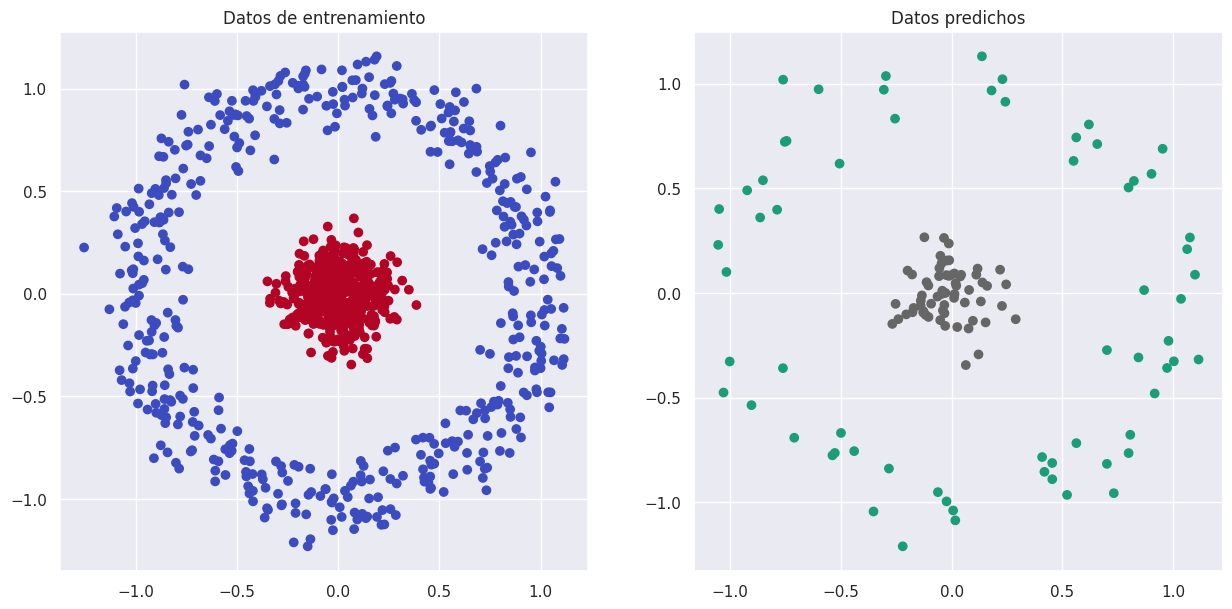

In [87]:
# Ploteamos las predicciones
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm')
plt.title("Datos de entrenamiento")
plt.subplot(1,2,2)
plt.scatter(Xtest[:,0],Xtest[:,1],c=y_pred,cmap='Dark2')
plt.title("Datos predichos");



---



🛠 <font style: color='orange'>**Ejercicio Extra:**</font> abajo tienen la implementación de un `perceptron simple` para la tarea de clasificación binaria de pacientes que son diabeticos vs no diabeticos `(0:No, 1:Si)`.

**Tratar** de mejorar las métricas implementando un `perceptrón multicapa`, y probando hiperparámetros hasta lograr métricas óptimas.

Este es un ejercicio personal para que practiquen, **no tiene entrega**. Sin embargo, me pueden compartir por Discord sus resultados o inquietudes que tengan.

Éxitos! 🦾

>**Nota:** Si quieren investiguen algún dataset para probar sus redes en [Kaggle](https://www.kaggle.com/), allí hay miles de conjuntos de datos.

In [88]:
# Descargamos el dataset
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-10-02 19:47:38--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2023-10-02 19:47:38 (132 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [89]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
X = df.drop(columns='Outcome').to_numpy()
y = df['Outcome'].to_numpy()

In [91]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.15, random_state=42)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.15, random_state=42)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.fit_transform(Xval)
Xtest = scaler.fit_transform(Xtest)

In [115]:
model_ps = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[8]),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='linear'),
    tf.keras.layers.Dense(1, activation='relu')

])
model_ps.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
history_ps = model_ps.fit(Xtrain,ytrain,validation_data=(Xval,yval),epochs=100)

Epoch 1/100
18/18 [==============================] - 3s 21ms/step - loss: 2.4140 - accuracy: 0.5235 - val_loss: 5.1308 - val_accuracy: 0.6552
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 2.2284 - accuracy: 0.5560 - val_loss: 1.0529 - val_accuracy: 0.3448
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 1.0449 - accuracy: 0.3466 - val_loss: 0.7544 - val_accuracy: 0.3362
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.5668 - val_loss: 0.6190 - val_accuracy: 0.6552
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6228 - accuracy: 0.6534 - val_loss: 0.6197 - val_accuracy: 0.6552
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6234 - accuracy: 0.6534 - val_loss: 0.6164 - val_accuracy: 0.6552
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6215 - accuracy: 0.6534 - val_loss: 0.6149 - val_accuracy: 0.6552
Epoch 8/100


<Axes: >

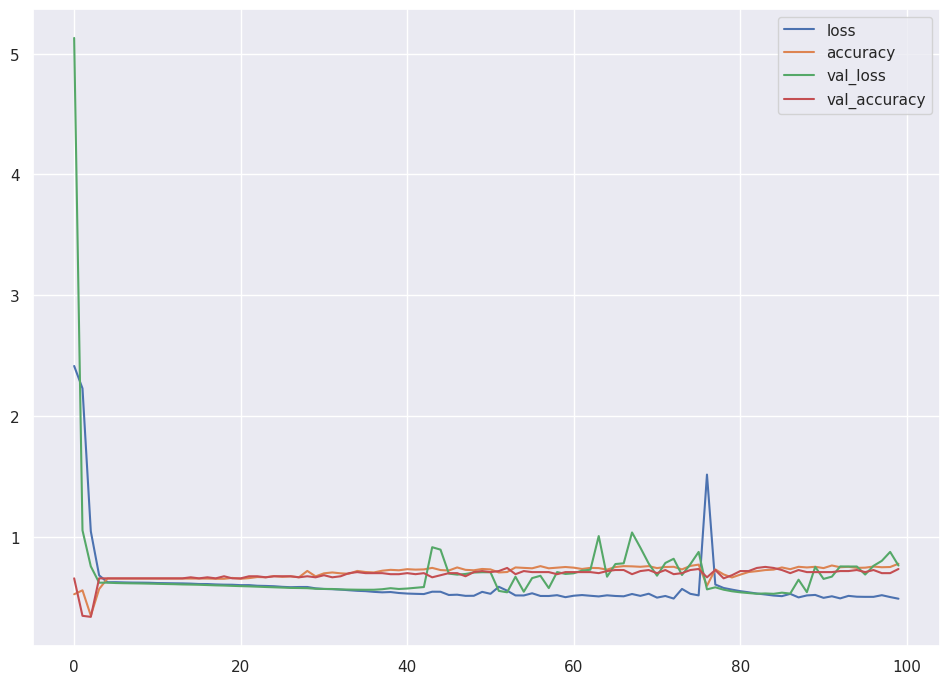

In [116]:
pd.DataFrame(history_ps.history).plot()